# 0.0 Business Problem

## Estágio do projeto:
Ciclo 2: Data cleaning

## 0.1 Contexto

A Empresa Cardio Catch Diseases (CCD)
A Cadio Catch Diseases é uma empresa especializada em detecção de doenças cardíacas em estágios iniciais. O seu modelo de negócio é do tipo Serviço, ou seja, a empresa ofereço o diagnóstico precoce de uma doença cardiovascular por um certo preço.

Atualmente, o diagnóstico de uma doença cardiovascular é feita manualmente por uma equipe de especialistas. A precisão atual do diagnóstico varia entre 55% e 65%, devido a complexidade do diagnóstico e também da fadiga da equipe que se revezam em turnos para minimizar os riscos. O custo de cada diagnóstico, incluindo os aparelhos e a folha de pagamento dos analistas, gira em torno de 1.000 reais.

O preço do diagnóstico, pago pelo cliente, varia de acordo com a precisão conseguida pelo time de especialistas, o cliente paga 500 reais a cada 5% de acurácia acima de 50%. Por exemplo, para uma precisão de 55%, o diagnóstico custa 500 reais para o cliente, para uma precisão de 60%, o valor é de 1000 reais e assim por diante. Se a precisão do diagnóstico for 50% o cliente não paga por ele.

Observe que a variação da precisão dada pelo time de especialistas, faz com que a empresa tenha ora uma operação com lucro, receita maior que o custo, ora uma operação com prejuízo, receita menor que o custo. Essa instabilidade do diagnóstico faz com que a empresa tenha um Cashflow imprevisível.

Projeto retirado do Blog Seja Um Data Scientist
https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/

Projeto original disponível na plataforma Kaggle
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## 0.2 Planejamento da Solução:

### 0.2.1 Objetivos:

1. Qual a Acurácia e a Precisão da ferramenta?
2. Quanto lucro a Cardio Catch Diseases passará a ter com a nova ferramenta?
3. Qual a Confiabilidade do resultado dados pela nova ferramenta?

### 0.2.2 Entregas:
1. Alguns parâmetros da métrica
2. Um número que representa o total de retorno financeiro
3. Parâmetros de credibilidade

### 0.2.3 Estratégia da solução:
1. Tratamento dos dados, feature engineering, seleção de features, treinamento do modelo, configuração de hiperparâmetros, seleção de modelos.
2. Definir baseline, custos, faturamentos e margens envolvidas no cenário "AS IS". Utilizar métrica de performance do modelo para projetar o cenário "TO BE". Calcular diferenças de margens entre os cenários.
3. Realizar calculos por inferência bayesiana

### 0.2.4 Planejamento da execução:

1. Ciclo 1: Criar um pipeline de dados funcional de ponta a ponta, desde a coleta dos dados até o treinamento do modelo
2. Ciclo 2: Data cleaning
3. Ciclo 3: Estatística de primeira e segunda ordens
4. Ciclo 4: Exploração de dados
5. Ciclo 5: Criação de hipóteses de negócio
6. Ciclo 6: Testes de hipóteses
7. Ciclo 7: Seleção de features
8. Ciclo 8: Preparação dos dados
9. Ciclo 9: Aperfeiçoamento da performance de predições
10. Ciclo 10: Deploy

## 0.3 Glossário de Features:

### Natureza das features:

1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.

### Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 0.4 Hipóteses Assumidas:
1. ...

## 0.5 Sumário:

## 0.6 Resultados e Conclusão:

# 1.0 Imports

## 1.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import time

tempo_agora = time.time()

## 1.2 Helper Functions

In [2]:
# buscar outliers pelo método de Tukey
def buscar_outliers(df, col):
    primeiro_quartil = df[col].quantile(0.25)
    terceiro_quartil = df[col].quantile(0.75)
    range_ = terceiro_quartil - primeiro_quartil
    salto = range_ * 1.5
    outliers_indices = df[(df[col]<primeiro_quartil - salto)|(df[col]>terceiro_quartil + salto)].index
    return outliers_indices

## 1.3 Loading Dataset

In [3]:
df = pd.read_csv('D:\\My drive\\Pessoal\\Projetos\\cardio_diseases_predict\\cardio_diseases_predict\\cardio_train.csv', sep=';')

# 2.0 Data Description and Cleaning

## 2.1 Main insights:
1. **Age:** com range entre 29 e 64 anos
2. **Gender:** mulheres são maioria com 65% do total
3. **Cholesterol:** 75% dos pacientes possuem colesterol normal
4. **Glucose:** 85% dos pacientes apresentam nível normal de glicemia
5. **Alcohol Intake:** 95% dos pacientes não consomem bebidas alcólicas
6. **Physical activity:** 50% praticam atividades físicas

## 2.2 General Analysis

##### 2.2 Looking dataset

In [4]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##### 2.3 Data Dimensions

In [5]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 70000
Number of columns: 13


##### 2.4 Data Types

In [6]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

##### 2.5 Check NaNs

In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### 2.6 Changing interesting features

Para uma melhor análise a idade será transformada de dias para anos

In [8]:
df['age_'] = df['age'] / 365
df['age_'] = df['age_'].astype('int')

##### 2.7 Segragating feature types

In [9]:
features_target = ['cardio']
features_remover = ['id', 'age_']
features_numéricas = ['age_', 'height', 'weight', 'ap_hi', 'ap_lo']
features_categóricas = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

## 2.3 Descriptive Statistics

##### 2.3.1 Numerical Features

In [10]:
df[features_numéricas].describe()

,age_,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


Range de idade entre 29 e 64 anos, altura máxima de 2 metros e meio provavelmente indica erros de input, peso mínimo de 10kgs tratando-se de adutos indica erros de input, pressão arterial com valores negativos tanto no ap_hi quanto no ap_lo, assim como seus máximos.

##### 2.3.2  Categorical Features

In [11]:
df[features_categóricas].astype('category').describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio
count,70000,70000,70000,70000,70000,70000,70000
unique,2,3,3,2,2,2,2
top,1,1,1,0,0,1,0
freq,45530,52385,59479,63831,66236,56261,35021


Mulheres são maioria com 65% do total, 75% dos pacientes possuem colesterol normal, 85% dos pacientes apresentam nível normal de glicemia, 95% dos pacientes não consomem bebidas alcólicas, 50% praticam atividades físicas

##### 2.3.3 Correlations

In [12]:
df.drop(features_remover, axis=1).corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


<AxesSubplot:>

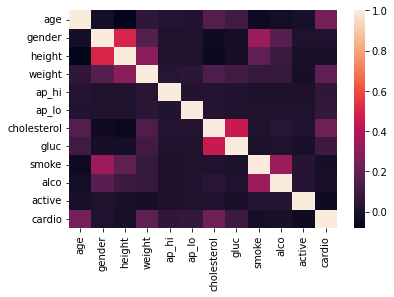

In [13]:
sns.heatmap(df.drop(features_remover, axis=1).corr())

1. moderada entre altura e gênero
2. moderada entre colesterol e glicemia
3. moderada entre consumidores de alcool e fumantes
4. moderada entre fumantes e idade
5. várias correlações fracas

## 2.4 Data Cleaning

In [14]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_'],
      dtype='object')

In [15]:
df[features_categóricas].nunique()

gender         2
cholesterol    3
gluc           3
smoke          2
alco           2
active         2
cardio         2
dtype: int64

Tudo ok

In [16]:
df[features_numéricas].describe()

,age_,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,164.359229,74.205690,128.817286,96.630414
std,6.766774,8.210126,14.395757,154.011419,188.472530
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


**height**

In [17]:
df[df['height'] > 200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1,58
21628,30894,19054,2,207,78.0,100,70,1,1,0,1,1,0,52


1. A primeira amostra é uma mulher com 2,5 metros, será considerado erro de input
2. A segunda amostra é um homem com 2,07 metros e 78 quilos, não parece incompatível.

In [18]:
df.drop(6486, inplace=True)

In [19]:
df[df['height']<100]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,59
7598,10843,14661,2,70,72.0,120,8,1,1,0,0,1,0,40
8171,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,48
12770,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,53
13265,18928,22456,2,71,68.0,120,80,3,1,0,0,1,0,61
14323,20459,22005,1,67,57.0,120,90,1,1,0,0,1,1,60
15167,21686,15812,1,70,68.0,120,80,1,1,0,0,0,0,43
16699,23859,19680,2,74,98.0,140,90,1,1,0,0,1,1,53
17277,24690,17530,1,98,45.0,12,80,1,1,0,0,1,0,48
22542,32207,14538,1,68,65.0,100,60,1,1,0,0,0,0,39


Algumas amostras aparentemente estão com altura e peso trocados

In [27]:
def altura_peso_invertidos(df, altura, peso):
    altura_primeiro_quantile = df[altura].quantile(0.25)
    altura_terceiro_quantile = df[altura].quantile(0.75)
    range_altura = altura_terceiro_quantile - altura_primeiro_quantile
    salto_altura = range_altura * 1.5
    peso_primeiro_quantile = df[peso].quantile(0.25)
    peso_terceiro_quantile = df[peso].quantile(0.75)
    range_peso = peso_terceiro_quantile - peso_primeiro_quantile
    salto_peso = range_peso * 1.5
    retorno = df.loc[((df[altura]>peso_primeiro_quantile-salto_peso)&(df[altura]<peso_terceiro_quantile+salto_peso))&((df[peso]>altura_primeiro_quantile-salto_altura)&(df[peso]<altura_terceiro_quantile+salto_altura))].index
    return retorno

In [28]:
invertidos_index = altura_peso_invertidos(df, 'height', 'weight')

In [31]:
df.loc[invertidos_index]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_
8171,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1,48
12770,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1,53
23913,34186,19074,1,81,156.0,140,90,1,1,0,0,1,0,52
27384,39156,15292,1,80,178.0,140,90,3,3,0,0,1,1,41
45358,64802,19834,1,104,159.0,200,100,3,1,0,0,0,1,54
59625,85128,17643,1,104,165.0,120,80,1,1,0,0,1,0,48


In [32]:
temp = df.loc[invertidos_index, 'height']
df.loc[invertidos_index, 'height'] = df.loc[invertidos_index, 'weight']
df.loc[invertidos_index, 'weight'] = temp

In [33]:
df.loc[invertidos_index]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_
8171,11662,17646,2,170.0,97.0,160,100,1,1,1,0,1,1,48
12770,18218,19594,1,168.0,75.0,120,80,1,1,1,0,1,1,53
23913,34186,19074,1,156.0,81.0,140,90,1,1,0,0,1,0,52
27384,39156,15292,1,178.0,80.0,140,90,3,3,0,0,1,1,41
45358,64802,19834,1,159.0,104.0,200,100,3,1,0,0,0,1,54
59625,85128,17643,1,165.0,104.0,120,80,1,1,0,0,1,0,48


**weight**

In [50]:
df.loc[df['weight'] > 83, 'id'].count()

15834

<AxesSubplot:xlabel='weight', ylabel='Count'>

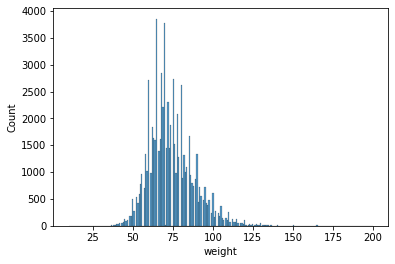

In [51]:
sns.histplot(df['weight'])

In [69]:
outliers_indices = buscar_outliers(df, 'weight')

In [70]:
df.loc[outliers_indices, 'id'].count()

1819

# 3.0 Feature Engineering

# 4.0 Business Hypothesis

# 5.0 Exploratory Data Analysis

# 6.0 Data Preparation

In [13]:
X = df.drop(features_remover, axis=1)
y = df[features_target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 7.0 Machine Learning

###### Model description

In [15]:
rf_model = RandomForestClassifier()

###### Fiting model

In [16]:
rf_fit = rf_model.fit(X_train, y_train)

C:\Users\Samoel\AppData\Local\Temp/ipykernel_5564/3223170611.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf_model.fit(X_train, y_train)


###### Predicts

In [17]:
rf_predict = rf_fit.predict(X_test)

###### Metrics

In [18]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10433
           1       1.00      1.00      1.00     10567

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



Overfitado

# 8.0 Results and Conclusions

# Time

In [19]:
print(f'O tempo de processamento do projeto foi de: {int(round(time.time()-tempo_agora, 2)/60)} minutos')

O tempo de processamento do projeto foi de: 1 minutos
